Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [2]:
#loading dataset
loan_df = pd.read_csv('loan.csv')

In [3]:
#Looking at sample of the data
loan_df.head(6)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [4]:
#number of rows and columns
loan_df.shape

(614, 13)

In [5]:
# Overview of the data
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
# Statistical measures for our data
loan_df.describe().T.style.background_gradient(cmap = 'viridis', low = 0.2, high =0.1)

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.000000,5403.459283,6109.041673,150.000000,2877.500000,3812.500000,5795.000000,81000.000000
CoapplicantIncome,614.000000,1621.245798,2926.248369,0.000000,0.000000,1188.500000,2297.250000,41667.000000
LoanAmount,592.000000,146.412162,85.587325,9.000000,100.000000,128.000000,168.000000,700.000000
Loan_Amount_Term,600.000000,342.000000,65.120410,12.000000,360.000000,360.000000,360.000000,480.000000
Credit_History,564.000000,0.842199,0.364878,0.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
# dealing with nan or null values
loan_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# filling in null values for numeric data
from sklearn.impute import SimpleImputer

loan_mean_num = SimpleImputer(strategy = 'median')
loan_mean_num.fit(loan_df[['LoanAmount','Loan_Amount_Term']])

loan_df[['LoanAmount','Loan_Amount_Term']] = loan_mean_num.transform(loan_df[['LoanAmount','Loan_Amount_Term']])

In [9]:
#filling null values in categorical data
loan_cat = SimpleImputer(strategy = 'most_frequent')
loan_cat.fit(loan_df[['Gender','Married','Dependents','Self_Employed','Credit_History']])

loan_df[['Gender','Married','Dependents','Self_Employed',
                     'Credit_History']] = loan_cat.transform(loan_df[['Gender','Married','Dependents','Self_Employed',
                     'Credit_History']])

In [10]:
# Checking that the null values has been filled
loan_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
# replacing the loan status with 1 or 0
loan_df.replace({'Loan_Status':{'N':0, 'Y':1}},inplace = True)

In [12]:
# checking our data
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [13]:
# checking the dependent values
loan_df['Dependents'].value_counts()

# We see that we get a 3+ which cannot be feed into our model

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [14]:
# replacing the value of 3+ to 4
loan_df = loan_df.replace(to_replace= '3+', value = 4)

In [15]:
#dependent values
loan_df['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

Data visualisation

<AxesSubplot:xlabel='Education', ylabel='count'>

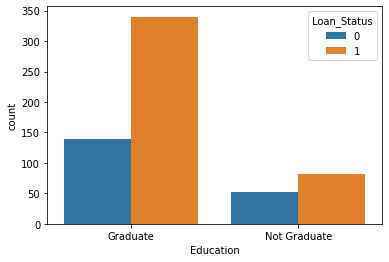

In [16]:
# education to loan status
sns.countplot(x='Education', hue = 'Loan_Status', data =loan_df)

We see the likelihood of a loan being approved for a graduate is slightly higher than that of the undergranduate.

<AxesSubplot:xlabel='Married', ylabel='count'>

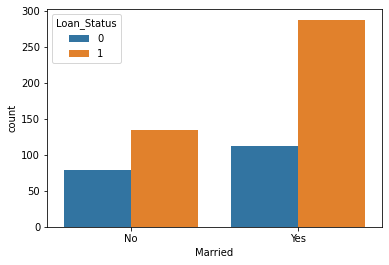

In [17]:
# marital status to loan status
sns.countplot(x ='Married', hue = 'Loan_Status', data = loan_df)

we see that loans are approved mostly for married people.

<AxesSubplot:xlabel='Gender', ylabel='count'>

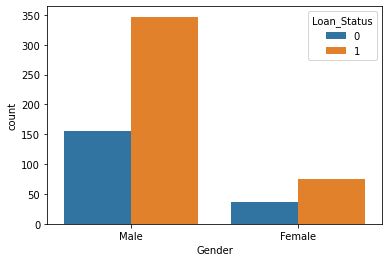

In [18]:
# checking the loanstatus to gender
sns.countplot(x = 'Gender', hue = 'Loan_Status', data = loan_df)

Here we see the bank or government is a misogynist as there is a huge disparity between approval for both genders...Lol, i joke.

In [19]:
# Let's build a pipeline like bob
loan_df1 = loan_df.copy()

In [20]:
y = loan_df1['Loan_Status']
x = loan_df1.drop(['Loan_ID','Loan_Status'], axis = 'columns')
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [21]:
x['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [22]:
x_cat = x.select_dtypes(include = 'object')
x_cat.drop(['Dependents'], axis = 'columns', inplace =True)

In [23]:
ohe = OneHotEncoder(sparse = True)
ohe.fit_transform(x[['Gender', 'Married','Education','Self_Employed','Property_Area']]).toarray()

array([[0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [24]:
#our column transformers worked when we called columns attribute according to their integers for resaons beyond me.
column_trans = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse=False,handle_unknown='ignore'),[0,1,3,4,10])
],remainder='passthrough')

In [25]:
column_trans.fit_transform(x)

array([[0.0, 1.0, 1.0, ..., 128.0, 360.0, 1.0],
       [0.0, 1.0, 0.0, ..., 128.0, 360.0, 1.0],
       [0.0, 1.0, 0.0, ..., 66.0, 360.0, 1.0],
       ...,
       [0.0, 1.0, 0.0, ..., 253.0, 360.0, 1.0],
       [0.0, 1.0, 0.0, ..., 187.0, 360.0, 1.0],
       [1.0, 0.0, 1.0, ..., 133.0, 360.0, 0.0]], dtype=object)

In [28]:
classifier = svm.SVC(kernel ='linear')

In [29]:
logreg = LogisticRegression(max_iter = 10000)

In [30]:
pipe = make_pipeline(column_trans, logreg)

In [31]:
cross_val_score(pipe, x, y, cv =5, scoring ='accuracy').mean()

0.8061975209916034

In [32]:
#Making a sample data of 10rows from x
x_new = x.sample(10, random_state =42)
x_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
350,Male,Yes,0,Graduate,No,9083,0.0,228.0,360.0,1.0,Semiurban
377,Male,Yes,0,Graduate,No,4310,0.0,130.0,360.0,1.0,Semiurban
163,Male,Yes,2,Graduate,No,4167,1447.0,158.0,360.0,1.0,Rural
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
132,Male,No,0,Graduate,No,2718,0.0,70.0,360.0,1.0,Semiurban
578,Male,Yes,1,Graduate,No,1782,2232.0,107.0,360.0,1.0,Rural
316,Male,Yes,2,Graduate,No,3717,0.0,120.0,360.0,1.0,Semiurban
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
340,Male,Yes,4,Not Graduate,No,2647,1587.0,173.0,360.0,1.0,Rural
77,Male,Yes,1,Graduate,Yes,1000,3022.0,110.0,360.0,1.0,Urban


In [33]:
pipe.fit(x,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 3, 4, 10])])),
                ('logisticregression', LogisticRegression(max_iter=10000))])

In [34]:
pipe.predict(x_new)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [35]:
loan_df['Loan_Status'].loc[[350, 377,163,609,132,578,316,2,340,77]]
# the model does poorly only in 2 times out of our to samples

350    1
377    1
163    1
609    1
132    1
578    1
316    1
2      1
340    0
77     0
Name: Loan_Status, dtype: int64

In [36]:
x_new1 = x.sample(200, random_state = 42)
x_new1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
350,Male,Yes,0,Graduate,No,9083,0.0,228.0,360.0,1.0,Semiurban
377,Male,Yes,0,Graduate,No,4310,0.0,130.0,360.0,1.0,Semiurban
163,Male,Yes,2,Graduate,No,4167,1447.0,158.0,360.0,1.0,Rural
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
132,Male,No,0,Graduate,No,2718,0.0,70.0,360.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...
93,Male,No,0,Graduate,No,4133,0.0,122.0,360.0,1.0,Semiurban
272,Male,No,0,Graduate,No,2833,1857.0,126.0,360.0,1.0,Rural
108,Male,Yes,2,Graduate,No,3800,3600.0,216.0,360.0,0.0,Urban
280,Male,No,1,Not Graduate,Yes,4053,2426.0,158.0,360.0,0.0,Urban


In [37]:
pipe.fit(x,y)
arr = pipe.predict(x_new1)

In [38]:
arr

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1], dtype=int64)

In [39]:
pipe = make_pipeline(column_trans, classifier)

In [40]:
cross_val_score(pipe, x, y, cv =5, scoring ='accuracy').mean()

0.781713981074237

In [41]:
#Making a sample data of 10rows from x
x_new = x.sample(10, random_state =42)
x_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
350,Male,Yes,0,Graduate,No,9083,0.0,228.0,360.0,1.0,Semiurban
377,Male,Yes,0,Graduate,No,4310,0.0,130.0,360.0,1.0,Semiurban
163,Male,Yes,2,Graduate,No,4167,1447.0,158.0,360.0,1.0,Rural
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
132,Male,No,0,Graduate,No,2718,0.0,70.0,360.0,1.0,Semiurban
578,Male,Yes,1,Graduate,No,1782,2232.0,107.0,360.0,1.0,Rural
316,Male,Yes,2,Graduate,No,3717,0.0,120.0,360.0,1.0,Semiurban
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
340,Male,Yes,4,Not Graduate,No,2647,1587.0,173.0,360.0,1.0,Rural
77,Male,Yes,1,Graduate,Yes,1000,3022.0,110.0,360.0,1.0,Urban


In [42]:
pipe.fit(x,y)
pipe.predict(x_new)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)